# Homework 1: Classification [5 points]


### HIDS 506, Spring 2023

### Due: Thursday, Feb 9th, 2022 11:59 pm E.T.

This homework will test your knowledge about Classification that you learned in lecture3. Fill in the code/answers for the questions as indicated below. 

Please edit this document directly using Jupyter or Google Colab and answer each of the questions in-line as indicated. 

Turn in a single document i.e. the Notebook showing all of your code and output for the entire assignment, with each question clearly demarcated. Submit your completed assignment through Canvas. The notebook can be downloaded by clicking the `File` option (top left) and clicking `Download .ipynb` in the drop down menu.

## 1. Gradient Descent (0.5 points)

When performing gradient descent on a large data set, which of the following batch sizes will likely be more efficient and why? Answer in a few sentences (2-3).





1.   A small batch or even a batch of one example (SGD).
2.   The full batch.



Answer: 

1. When performing gradient descent on a large dataset, a training epoch focused on a batch request for one example (performing updates for one example at a time) may provide a solution for memory storage. A small batch request using Stochastic Gradient Descent (SGD) can be helpful to preserve memory storage by only holding one example at a time and return frequent updates. However, frequent updates may result in loss of computational efficiency and noisy gradients.

2. Running a full batch request on a large dataset can have computational effiecny with a stable error gradient. However, because the data set is so large, a full batch request may take more time to produce results, use more memory storage, and only updates fully once the model has evaluated all training examples.

SGD is likely to be more effcient and more favorable for large datasets as this optimization technique involves a batch request of one-sample at a time. With many samples and features in a large dataset, traditional gradient descent with one large batch request may result in high run-times and insufficent memory storage. Evaluating each sample (one at a time) reduces run time and memory storage to provide detailed results for large datasets. 


## 2. Sigmoid Function (0.5 points)

What is the primary purpose of the sigmoid/logistic function in generating the hypothesis function output in logistic regression?

1.   Make the loss/cost function convex
2.   Map the decision boundary value (θᵀX) to a range between (0,1) 
3.   Make the loss/cost function differentiable
4.   Efficient computation of feature weights 

Answer:

The primary purpose of the sigmoid/logistic function in generating the hypothesis function output in logistic regression is to map the decision boundary value to a range between (0,1). The sigmoid function is an activation function which maps any real number to the (0, 1) transforming an arbitrary-valued function into a function better suited for classification.

## 3. Hospital Length of Stay Classification (4 points)

We will transform the regression problem of predicting the numerical continuous value length of stay (`LOS`) that we studied in lecture 2 lab to a classification problem and fit and evaluate classification models which we studied in lecture 3 lab. We will convert the `LOS` numerical continuous variable to a binary label indicating whether the patient was in the hospital for less than a week or not. Perform the following tasks:

1. You will be using the `los_dataset_cleaned.csv` that we used in lecture 2 lab. Download and read the dataset from Files/Homeworks/Homework1 on Canvas. The dataset has already been cleaned and features for prediction created. No further feature creation/engineering and cleaning is required. 

2. Create a binary label `Outcome` to indicate if the patient stayed a week or more in the hospital  i.e.  `if LOS > 6 days` then y=1 (positive label); `if LOS <=6 days` then y=0 (negative label) . What is the distribution of this binary `Outcome` label. Split the dataset into features matrix and the outcome variable. Remember to remove the `LOS` numerical continuous variable as this is not needed and if included induce data leakage from the features to the binary outcome. Note: Refer to lab 1 `1_EDA_solved.ipyn`b to check how to create a new column based on conditions on a different column (Hint: combination of a function and the `apply` function)

3. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30)

4. Fit a Logistic Regression model on the training set and output evaluation metrics (precision, recall and f1-score) for prediction on the test set. Also, print the classification report for predictions on the test set.

5. Fit one other classifier (Random Forest Classifier or Support Vector Machine) and repeat step 4. Did the performance on the test set improve?

6. Output a feature importance/ranking using any tree based classifier on the training set. Hint : refer to `Feature Importance using Tree-Based Classifiers` section in lab 3 `3_classification_solved.ipynb notebook`.



In [2]:
# mounting google drive to import dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1. You will be using the los_dataset_cleaned.csv that we used in lecture 2 lab. Download and read the dataset from Files/Homeworks/Homework1 on Canvas. The dataset has already been cleaned and features for prediction created. No further feature creation/engineering and cleaning is required.


In [3]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [4]:
# reading in the los_dataset_cleaned.csv data set
data_los = "/content/drive/MyDrive/Colab Notebooks/data-2/los_dataset_cleaned.csv"
los_df = pd.read_csv(data_los)
los_df.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
# visualize columns
los_df.columns

Index(['LOS', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
       'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
       'GENDER', 'ICU', 'NICU', 'ADM_ELECTIVE', 'ADM_EMERGENCY', 'ADM_NEWBORN',
       'ADM_URGENT', 'INS_Government', 'INS_Medicaid', 'INS_Medicare',
       'INS_Private', 'INS_Self Pay', 'REL_NOT SPECIFIED', 'REL_RELIGIOUS',
       'REL_UNOBTAINABLE', 'ETH_ASIAN', 'ETH_BLACK/AFRICAN AMERICAN',
       'ETH_HISPANIC/LATINO', 'ETH_OTHER/UNKNOWN', 'ETH_WHITE',
       'AGE_middle_adult', 'AGE_newborn', 'AGE_senior', 'AGE_young_adult',
       'MAR_DIVORCED', 'MAR_LIFE PARTNER', 'MAR_MARRIED', 'MAR_SEPARATED',
       'MAR_SINGLE', 'MAR_UNKNOWN (DEFAULT)', 'MAR_WIDOWED'],
      dtype='object')

In [6]:
# visualize data types 
los_df.dtypes

LOS                           float64
blood                         float64
circulatory                   float64
congenital                    float64
digestive                     float64
endocrine                     float64
genitourinary                 float64
infectious                    float64
injury                        float64
mental                        float64
misc                          float64
muscular                      float64
neoplasms                     float64
nervous                       float64
pregnancy                     float64
prenatal                      float64
respiratory                   float64
skin                          float64
GENDER                        float64
ICU                           float64
NICU                          float64
ADM_ELECTIVE                    int64
ADM_EMERGENCY                   int64
ADM_NEWBORN                     int64
ADM_URGENT                      int64
INS_Government                  int64
INS_Medicaid

In [7]:
# visualize summary of information about data set 
los_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51037 entries, 0 to 51036
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOS                         51037 non-null  float64
 1   blood                       51037 non-null  float64
 2   circulatory                 51037 non-null  float64
 3   congenital                  51037 non-null  float64
 4   digestive                   51037 non-null  float64
 5   endocrine                   51037 non-null  float64
 6   genitourinary               51037 non-null  float64
 7   infectious                  51037 non-null  float64
 8   injury                      51037 non-null  float64
 9   mental                      51037 non-null  float64
 10  misc                        51037 non-null  float64
 11  muscular                    51037 non-null  float64
 12  neoplasms                   51037 non-null  float64
 13  nervous                     510

2. Create a binary label Outcome to indicate if the patient stayed a week or more in the hospital i.e. if LOS > 6 days then y=1 (positive label); if LOS <=6 days then y=0 (negative label) . What is the distribution of this binary Outcome label. Split the dataset into features matrix and the outcome variable. Remember to remove the LOS numerical continuous variable as this is not needed and if included induce data leakage from the features to the binary outcome. Note: Refer to lab 1 1_EDA_solved.ipynb to check how to create a new column based on conditions on a different column (Hint: combination of a function and the apply function)


In [8]:
# function takes as an input length of stay (LOS) and outputs classification for positive (y=1) or negagtive (y=0) label
def los_groups(x):
  # if length of stay (LOS) <= 6 days, y=0 (negative outcome/label)
    if x <= 6:
        return 0
  # # if length of stay (LOS) > 6 days, y=1 (positive outcome/label)
    if x > 6:
      return 1

In [9]:
# applying los_groups to LOS column and creating a new column 'Outcome' to store outcome labels for each LOS
los_df["Outcome"] = los_df["LOS"].apply(los_groups)
los_df.Outcome.value_counts() # visualize counts of each outcome label 

1    27542
0    23495
Name: Outcome, dtype: int64

In [10]:
# 'Outcome' only includes binary outcome values (0,1) indicating positive or negative for LOS > 6 (y=1) or LOS <= 6 (y=0)
los_df["Outcome"].head()

0    0
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

(array([23495.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 27542.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

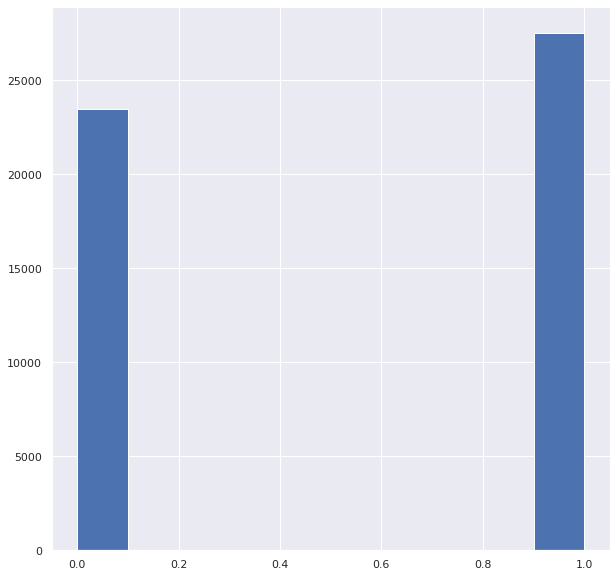

In [11]:
# visualize the distribution of the 'Outcome' column
plt.hist(los_df['Outcome'])

3. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30)


In [12]:
# Preparing the data for the ML model
# Target Variable (Outcome)
X_df = los_df.drop('Outcome',axis=1).drop('LOS', axis=1) # relevant features, dropping LOS and Outcome columns
y_df = los_df['Outcome'] # Outcome measured 

In [13]:
# visualize features, ensure outcome is not included 
X_df.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
1,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
# visualize outcome binary variable 
y_df.head()

0    0
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [15]:
# splitting the data into a 70:30 split where we will train on 80% and test on 20%
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2)

In [16]:
# visualizing the shape of our split test and train variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40829, 48), (10208, 48), (40829,), (10208,))

In [17]:
# showing the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 40829 samples.
Testing set has 10208 samples.


In [18]:
# visualizing the X_test data
X_test.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
14992,0.0,4.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
50568,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
13732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
2651,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0,5.0,2.0,...,0,0,0,0,0,0,0,1,0,0
39998,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [19]:
# visualizing the y_test data
y_test.head()

14992    1
50568    1
13732    1
2651     1
39998    0
Name: Outcome, dtype: int64

In [20]:
# getting the count of y_train and y_test sets 
Counter(y_train), Counter(y_test)

(Counter({1: 21947, 0: 18882}), Counter({1: 5595, 0: 4613}))

4. Fit a Logistic Regression model on the training set and output evaluation metrics (precision, recall and f1-score) for prediction on the test set. Also, print the classification report for predictions on the test set.


In [21]:
# fit the model using logistic regression with a max iteration of 500
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
# generating predictions of outcome (0,1) on the test set and assigning to new variable y_pred 
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [23]:
# generating probabilities on test set 
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.3947656 , 0.6052344 ],
       [0.18405369, 0.81594631],
       [0.00603127, 0.99396873],
       ...,
       [0.32897019, 0.67102981],
       [0.71995281, 0.28004719],
       [0.23087978, 0.76912022]])

(array([ 664.,  250.,  681., 1366., 1508., 1512., 1353., 1162.,  947.,
         765.]),
 array([0.01059146, 0.10953185, 0.20847224, 0.30741264, 0.40635303,
        0.50529342, 0.60423381, 0.70317421, 0.8021146 , 0.90105499,
        0.99999538]),
 <a list of 10 Patch objects>)

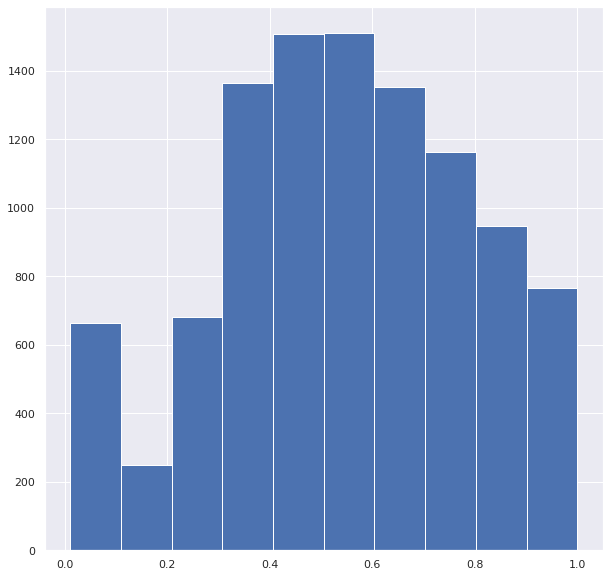

In [24]:
# plotting the generated probabilities from above 
plt.hist(y_pred_prob[:,1])

In [25]:
# plotting a confusion matrix to visualize true positive, true negative, false positive, and false negative values 
cm = confusion_matrix(y_test, y_pred)
cm

array([[2958, 1655],
       [1442, 4153]])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5062bc5eb0>)

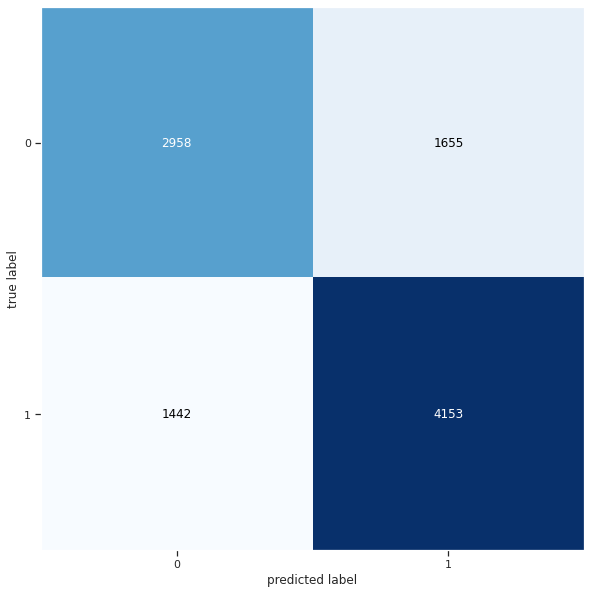

In [26]:
plot_confusion_matrix(conf_mat=cm, show_absolute=True)

In [27]:
# using the confusion matrix function to extract the different types of errors
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(2958, 1655, 1442, 4153)

In [28]:
# generating metrics on our model 
#Accuracy 
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy: %.3f' % accuracy)

#Recall/Sensitivity/True Positive rate
recall = sensitivity = tpr = tp / (tp + fn)
print('Recall: %.3f' % recall)

#Precision
precision = tp / (tp + fp)
print('Precision: %.3f' % precision)

#Specificity/Negative Recall/ True negative Rate/ 1-False Positive Rate
specificity = tn / (tn + fp)
print('Specificity: %.3f' % specificity)

#F1 Score
f1 = 2*(precision*recall)/(precision+recall)
print('F1: %.3f' % f1)

Accuracy: 0.697
Recall: 0.742
Precision: 0.715
Specificity: 0.641
F1: 0.728


In [29]:
# metrics using y_test, y_pred (predicted outcome values)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

#Recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

#Precision
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

#The f1-score is the harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)
print('F1: %.3f' % f1)

Accuracy: 0.697
Recall: 0.742
Precision: 0.715
F1: 0.728


In [30]:
#Function that calculates and print metrics
def show_metrics(y_test, y_pred):
  print('====================')
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(y_test, y_pred)
  print('Recall: %.3f' % recall)
  precision = precision_score(y_test, y_pred)
  print('Precision: %.3f' % precision)
  f1 = f1_score(y_test, y_pred)
  print('F1: %.3f' % f1)
  print('====================')

In [31]:
# printing metrics using function above and applying on y_test and y_pred
show_metrics(y_test, y_pred)

Accuracy: 0.697
Recall: 0.742
Precision: 0.715
F1: 0.728


In [32]:
#Function that returns predictions at a specific threshold
def get_predictions(y_pred_prob, threshold=0.5):
  predictions = np.where(y_pred_prob <= threshold, 0, 1)
  return predictions[:,1]

In [33]:
# preforming metrics with an increased threshold to decrease false positives, howevere false negatives will increase resulting in higher precision and a lower recall value
y_pred1 = get_predictions(y_pred_prob, 0.7)
show_metrics(y_test, y_pred1)

Accuracy: 0.632
Recall: 0.424
Precision: 0.817
F1: 0.558


In [35]:
# decreased thershold that increases false positives and decreases false negatives resulting in decreased precision and increased recall
y_pred2 = get_predictions(y_pred_prob, 0.3)
show_metrics(y_test, y_pred2)
# metrics are significantly increased when threshold is lower

Accuracy: 0.659
Recall: 0.965
Precision: 0.622
F1: 0.756


In [36]:
#AUROC = Area Under the Receiver Operating Characteristic curve
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('AUCROC: %.3f' % roc_auc) # AUCROC Curve = 0.773 which is above the threshold of 0.5 (random guessing)

AUCROC: 0.773


In [37]:
# generating true positive rate and false positive rate 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
y_pred_prob[:,1]
len(np.unique(y_pred_prob[:,1]))

9549

In [38]:
# shape of test with thresholds
y_test.shape, thresholds.shape

((10208,), (4121,))

AUROC: 1.000


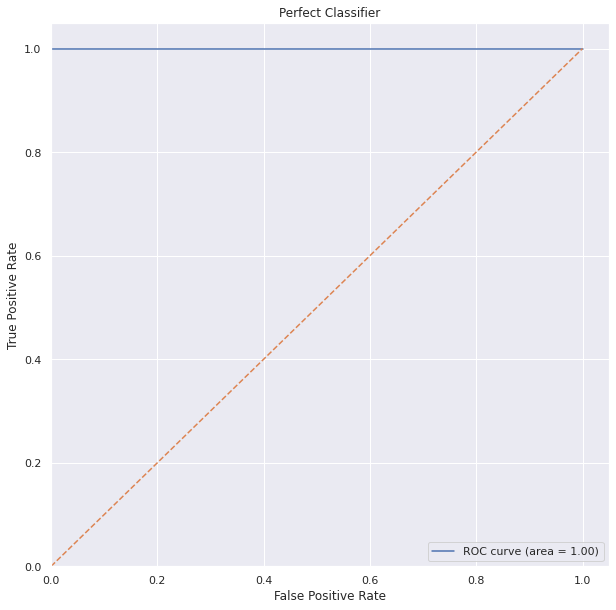

AUROC: 0.501


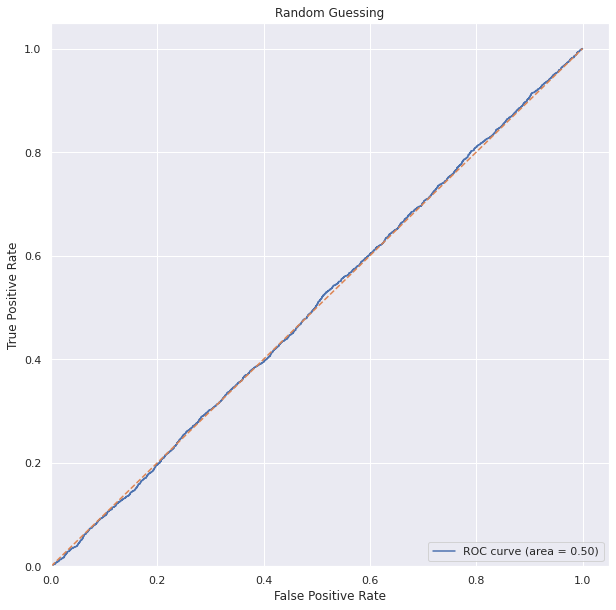

AUROC: 0.773


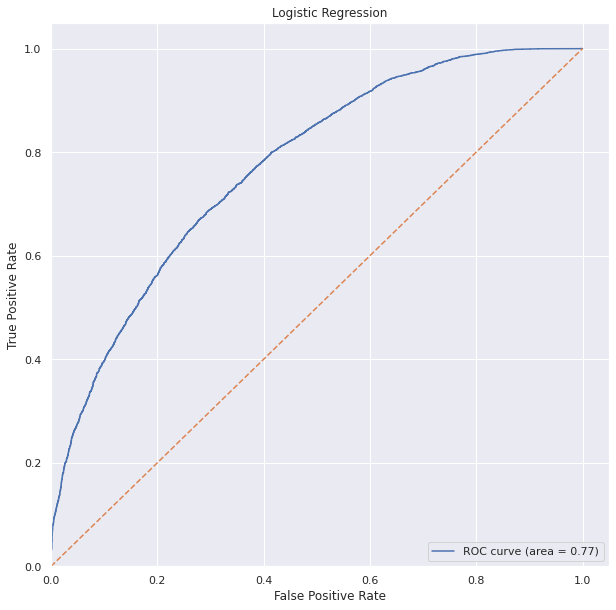

In [39]:
# plotting ROC curve using function 
pd.DataFrame([fpr,tpr,thresholds]).T

#Function to plot ROC curve  
def plot_roc(y_test, predictions, title):
    fpr, tpr, thresholds = roc_curve(y_test, predictions, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# plotting perfect classifier, random guessing, and logistic regression 
plot_roc(y_test, y_test,"Perfect Classifier")
plot_roc(y_test, np.random.uniform(0, 1, len(y_test)) ,"Random Guessing")
plot_roc(y_test ,y_pred_prob[:,1], "Logistic Regression")

In [40]:
# full classification report of test set and predcitions 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66      4613
           1       0.72      0.74      0.73      5595

    accuracy                           0.70     10208
   macro avg       0.69      0.69      0.69     10208
weighted avg       0.70      0.70      0.70     10208



5. Fit one other classifier (Random Forest Classifier or Support Vector Machine) and repeat step 4. Did the performance on the test set improve?

  With Random forest, precision of predicting y=0 increased from 67% (logistic regression) to 70% and recall decreased from 64% to 62% (see result below). Overall performance of the model using random forest classification to predict length of stay > 6 days (y=1) also did not change significantly between the logistic regression model and random forest model. Additionally, when comparing AUCROC curves for each model, both random forest and logistic regression produced an AUCROC curve of 0.77 which is above the threshold for random guessing (0.5). 

6. Output a feature importance/ranking using any tree based classifier on the training set. Hint : refer to Feature Importance using Tree-Based Classifiers section in lab 3 3_classification_solved.ipynb notebook.

  Prenatal, injury, circulatory, respiratory features showed the most importance when using the tree-based classifier.

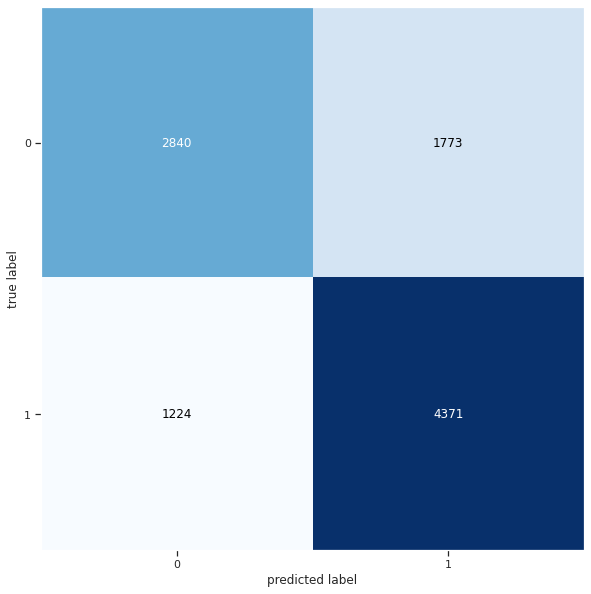

              precision    recall  f1-score   support

           0       0.70      0.62      0.65      4613
           1       0.71      0.78      0.74      5595

    accuracy                           0.71     10208
   macro avg       0.71      0.70      0.70     10208
weighted avg       0.71      0.71      0.70     10208

Accuracy: 0.706
Recall: 0.781
Precision: 0.711
F1: 0.745
AUCROC: 0.775


In [41]:
# fitting the model using Random Forest

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

# prediction
predictions_proba = model.predict_proba(X_test)
predictions = model.predict(X_test)


# getting the confusion matrix 
cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm, show_absolute=True)
plt.show()

# printing the classification report
print(classification_report(y_test, predictions))

# getting the metrics
show_metrics(y_test, predictions)

# computing and print AUC-ROC Curve
roc_auc = roc_auc_score(y_test, predictions_proba[:,1])
print('AUCROC: %.3f' % roc_auc)

In [44]:
# xgboost import
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [43]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

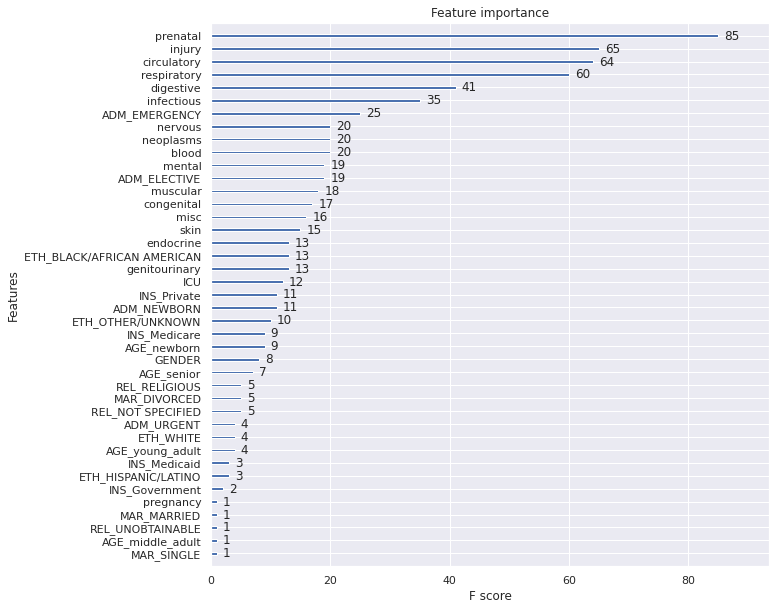

In [45]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)
plt.show()
# prenatal, injury, circulatory, and respiratory features showed the highest importance when fitting the model